# Brexit Tweets

### Importing the data file "brexit_tweet_count_by_data.csv" into a Pandas DataFrame object. Pivoting the data so that each date is on a single row and with separate columns for tweets and retweets.

In [ ]:
import pandas as pd
import numpy as np

brexitdf = pd.read_csv('brexit_tweet_count_by_data.csv') 
brexitdf = brexitdf.pivot_table(values='total_count',
                                index=['date'], columns=['retweet'], aggfunc=np.sum)
brexitdf.columns = ['Tweets', 'Retweets'] # Renaming columns for clarity
print(brexitdf)

### Importing the data files in the directory BBData using read_csv. Cleaning them, removing missing and irrelevant data, and joining them together. Then creating a single line plot showing all of the series (see `plot.PNG` in this repository). 

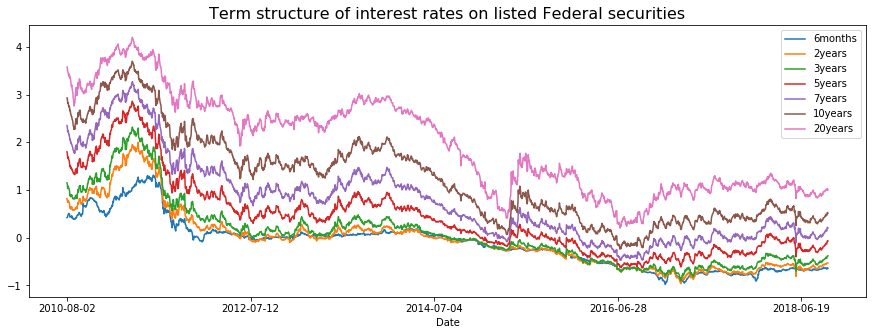

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
x_ticks = np.arange(0, 3000, 500)

datafile = list(map(lambda x: 'BBData/'+str(x)+'years.csv', [2,3,5,7,10,20]))
datafile.insert(0, 'BBData/6months.csv')
columnname = list(map(lambda x: str(x)+'years', [2,3,5,7,10,20]))
columnname.insert(0, '6months')
for i,(name,file) in enumerate(zip(columnname, datafile)):
    df0 = pd.read_csv(file, index_col=0, header=[0, 0])
    df0.columns = [name, 'B']
    df0 = pd.DataFrame(df0[name][3:])
    df0 = df0[df0!='.']
    #### your code here
    df0 = df0.apply(pd.to_numeric)
    df0 = df0.dropna()
    plt.xticks(x_ticks)
    plt.plot(df0)
    

plt.xlabel('Date', fontsize = 10)
plt.xticks(ticks=None)
plt.legend(columnname, loc = 'best')
plt.title('Term structure of interest rates on listed Federal securities', 
          fontdict=None, loc='center', pad=None, fontsize = 16)
plt.savefig('BBData plot.png') # Saving as a .png
plt.show()   